In [8]:
import numpy as np
# Install the required libraries
!pip install numpy
!pip install tensorflow
!pip install matplotlib

# Now you can import the libraries and use them in your code
import numpy as np
import tensorflow as tf
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Permute, Bidirectional, BatchNormalization, Conv2D, LSTM, Dense, Dropout, ELU, Flatten, MaxPool2D, TimeDistributed
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, BatchNormalization, ELU, Flatten
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers.schedules import ExponentialDecay




In [2]:
import numpy as np
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

X_train_valid = X_train_valid[:, :22, :]
X_test = X_test[:, :22, :]
y_train_valid = to_categorical(y_train_valid - 769)
y_test = to_categorical(y_test - 769)



#cleaning data even further
#adding noise to the data for better generalization
# X_train_valid = X_train_valid + np.random.normal(0, 0.5, X_train_valid.shape)
# X_test = X_test + np.random.normal(0, 0.5, X_test.shape)


In [3]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115, 4)
Test target shape: (443, 4)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [4]:
# Load data
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")

X_train_valid = X_train_valid[:, :22, :]
X_test = X_test[:, :22, :]
y_train_valid = to_categorical(y_train_valid - 769)
y_test = to_categorical(y_test - 769)

In [48]:
def crnn_model(kernel_initializer, time_period=1000):
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(1, 10), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01), input_shape=(22, time_period, 1), data_format='channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))

    model.add(Conv2D(32, kernel_size=(21, 1), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))

    model.add(Conv2D(64, kernel_size=(1, 10), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))

    model.add(Conv2D(128, kernel_size=(1, 10), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.4))

    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(128, kernel_initializer=kernel_initializer, return_sequences=True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer=kernel_initializer, return_sequences=True)))
    model.add(Bidirectional(LSTM(32, kernel_initializer=kernel_initializer)))
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, epsilon=1e-8, weight_decay=0.01), metrics=[categorical_accuracy])

    return model

def crnn_model_smaller_than_300(kernel_initializer, time_period=300):
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(1, 10), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01), input_shape=(22, time_period, 1), data_format='channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))

    model.add(Conv2D(32, kernel_size=(21, 1), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))

    model.add(Conv2D(64, kernel_size=(1, 10), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.4))

    model.add(Permute((2, 3, 1)))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(128, kernel_initializer=kernel_initializer, return_sequences=True)))
    model.add(Bidirectional(LSTM(64, kernel_initializer=kernel_initializer, return_sequences=True)))
    model.add(Bidirectional(LSTM(32, kernel_initializer=kernel_initializer)))
    model.add(Dropout(0.4))
    model.add(Dense(4, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, epsilon=1e-8, weight_decay=0.01), metrics=[categorical_accuracy])

    return model

def train_data(sub_idx=None, time_period=1000):
    # different period of time
    X_train_valid_cur = X_train_valid[:, :, :time_period]
    y_train_valid_cur = y_train_valid
    X_test_cur = X_test[:, :, :time_period]
    y_test_cur = y_test

    # single subject dataset
    if sub_idx is not None:
        X_train_valid_cur = X_train_valid_cur[np.where(person_train_valid == sub_idx)[0]]
        y_train_valid_cur = y_train_valid[np.where(person_train_valid == sub_idx)[0]]
        X_test_cur = X_test_cur[np.where(person_test == sub_idx)[0]]
        y_test_cur = y_test[np.where(person_test == sub_idx)[0]]

    # preprocess data
    X_train_valid_cur = np.expand_dims(X_train_valid_cur, axis=3)
    X_test_cur = np.expand_dims(X_test_cur, axis=3)
    lecun = lecun_uniform(seed=42)

    if time_period < 300:
        model = crnn_model_smaller_than_300(lecun, time_period)
    else:
        model = crnn_model(lecun, time_period)
    model.fit(X_train_valid_cur, y_train_valid_cur, epochs=40, batch_size=32, validation_data=(X_test_cur, y_test_cur), shuffle=True, verbose=1)
    train_score = model.evaluate(X_train_valid_cur, y_train_valid_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)

    print('train {:s}: {:.3f}%'.format(model.metrics_names[1], train_score[1]*100))
    print('test {:s}: {:.3f}%'.format(model.metrics_names[1], test_score[1]*100))
    print(model.summary())

    return train_score, test_score

In [46]:
train_score, test_score = train_data(time_period=1000)

Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 291ms/step - categorical_accuracy: 0.2563 - loss: 2.6862 - val_categorical_accuracy: 0.2777 - val_loss: 1.7671
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - categorical_accuracy: 0.2798 - loss: 1.6687 - val_categorical_accuracy: 0.3025 - val_loss: 1.5002
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - categorical_accuracy: 0.2776 - loss: 1.5001 - val_categorical_accuracy: 0.2551 - val_loss: 1.4894
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - categorical_accuracy: 0.3493 - loss: 1.4120 - val_categorical_accuracy: 0.3205 - val_loss: 1.4119
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - categorical_accuracy: 0.3640 - loss: 1.3908 - val_categorical_accuracy: 0.3837 - val_loss: 1.3553
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - categorical_accuracy: 0.4262 - loss: 1.3455 - val_categorical_accuracy: 0.3702 - val_loss: 1.3612
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - categorical_accuracy: 0.402

Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_214 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_214         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_215 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_215         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_216 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_216         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_217 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_217         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_212 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_2 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 12, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 12, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_213 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None


In [47]:
single_train_scores = []
single_test_scores = []
for i in range(9):
    train_score, test_score = train_data(sub_idx=i)
    single_train_scores.append(train_score[1])
    single_test_scores.append(test_score[1])

print("Single train accuracies: ")
print(single_train_scores)
print("Single test accuracies: ")
print(single_test_scores)

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - categorical_accuracy: 0.2812 - loss: 2.9918 - val_categorical_accuracy: 0.3000 - val_loss: 2.8725
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - categorical_accuracy: 0.2568 - loss: 2.8117 - val_categorical_accuracy: 0.2400 - val_loss: 2.6582
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - categorical_accuracy: 0.2451 - loss: 2.6334 - val_categorical_accuracy: 0.2800 - val_loss: 2.4931
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - categorical_accuracy: 0.3289 - loss: 2.4099 - val_categorical_accuracy: 0.3000 - val_loss: 2.2874
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - categorical_accuracy: 0.3006 - loss: 2.2621 - val_categorical_accuracy: 0.2200 - val_loss: 2.2182
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - categorical_accuracy: 0.3740 - loss: 2.0606 - val_categorical_accuracy: 0.2800 - val_loss: 2.1628
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - categorical_accuracy: 0.3466 - loss: 1.9576 - va

Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_218 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_218         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_219 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_219         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_220 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_220         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_221 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_221         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_214 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_3 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 12, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 12, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_215 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - categorical_accuracy: 0.2451 - loss: 3.0222 - val_categorical_accuracy: 0.2400 - val_loss: 2.8451
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - categorical_accuracy: 0.2283 - loss: 2.8252 - val_categorical_accuracy: 0.3000 - val_loss: 2.6328
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - categorical_accuracy: 0.2705 - loss: 2.5997 - val_categorical_accuracy: 0.2000 - val_loss: 2.4448
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - categorical_accuracy: 0.2685 - loss: 2.4009 - val_categorical_accuracy: 0.2400 - val_loss: 2.2457
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - categorical_accuracy: 0.2346 - loss: 2.2225 - val_categorical_accuracy: 0.2400 - val_loss: 2.0977
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - categorical_accuracy: 0.3169 - loss: 2.0346 - val_categorical_accuracy: 0.2000 - val_loss: 1.9442
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - categorical_accuracy: 0.2333 - loss: 1.9190

Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_43 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_222 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_222         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_223 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_223         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_224 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_224         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_225 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_225         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_216 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_4 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 12, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 12, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_217 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 407ms/step - categorical_accuracy: 0.2503 - loss: 2.9765 - val_categorical_accuracy: 0.2200 - val_loss: 2.8546
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - categorical_accuracy: 0.2710 - loss: 2.8165 - val_categorical_accuracy: 0.1800 - val_loss: 2.6716
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - categorical_accuracy: 0.2063 - loss: 2.6670 - val_categorical_accuracy: 0.1800 - val_loss: 2.4882
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - categorical_accuracy: 0.3020 - loss: 2.4052 - val_categorical_accuracy: 0.1800 - val_loss: 2.3102
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - categorical_accuracy: 0.1870 - loss: 2.2993 - val_categorical_accuracy: 0.2800 - val_loss: 2.1270
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - categorical_accuracy: 0.3088 - loss: 2.0971 - val_categorical_accuracy: 0.1800 - val_loss: 2.0279
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - categorical_accuracy: 0.3335 - loss: 1.9442

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_47 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_226 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_226         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_227 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_227         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_228 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_228         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_229 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_229         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_218 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_5 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 12, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 351ms/step - categorical_accuracy: 0.2502 - loss: 2.9964 - val_categorical_accuracy: 0.2800 - val_loss: 2.8422
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - categorical_accuracy: 0.2354 - loss: 2.8563 - val_categorical_accuracy: 0.1200 - val_loss: 2.8225
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - categorical_accuracy: 0.2708 - loss: 2.7070 - val_categorical_accuracy: 0.1800 - val_loss: 2.5483
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - categorical_accuracy: 0.2938 - loss: 2.4812 - val_categorical_accuracy: 0.2600 - val_loss: 2.3202
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - categorical_accuracy: 0.2628 - loss: 2.3013 - val_categorical_accuracy: 0.2200 - val_loss: 2.1954
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - categorical_accuracy: 0.3037 - loss: 2.1624 - val_categorical_accuracy: 0.1200 - val_loss: 2.1033
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - categorical_accuracy: 0.3232 - loss: 2.0335

Model: "sequential_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_230 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_230         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_231 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_231         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_232 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_232         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_233 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_233         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_220 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_6 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ (None, 12, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 375ms/step - categorical_accuracy: 0.2223 - loss: 3.0043 - val_categorical_accuracy: 0.1702 - val_loss: 3.0267
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - categorical_accuracy: 0.2918 - loss: 2.8885 - val_categorical_accuracy: 0.2340 - val_loss: 2.6669
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - categorical_accuracy: 0.3193 - loss: 2.6180 - val_categorical_accuracy: 0.2340 - val_loss: 2.4891
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - categorical_accuracy: 0.1979 - loss: 2.4768 - val_categorical_accuracy: 0.2553 - val_loss: 2.3021
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - categorical_accuracy: 0.2108 - loss: 2.2895 - val_categorical_accuracy: 0.1702 - val_loss: 2.1700
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - categorical_accuracy: 0.2719 - loss: 2.1143 - val_categorical_accuracy: 0.2553 - val_loss: 1.9848
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - categorical_accuracy: 0.3262 - loss: 1.9635

Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_234 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_234         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_235 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_235         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_236 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_236         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_237 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_237         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_222 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_7 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ (None, 12, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 350ms/step - categorical_accuracy: 0.1975 - loss: 3.0366 - val_categorical_accuracy: 0.1837 - val_loss: 2.9262
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - categorical_accuracy: 0.3153 - loss: 2.8136 - val_categorical_accuracy: 0.2041 - val_loss: 2.6967
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - categorical_accuracy: 0.3102 - loss: 2.6497 - val_categorical_accuracy: 0.2041 - val_loss: 2.5464
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - categorical_accuracy: 0.2761 - loss: 2.4505 - val_categorical_accuracy: 0.2041 - val_loss: 2.3320
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - categorical_accuracy: 0.3057 - loss: 2.2666 - val_categorical_accuracy: 0.2041 - val_loss: 2.2395
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - categorical_accuracy: 0.2319 - loss: 2.1578 - val_categorical_accuracy: 0.2041 - val_loss: 2.0962
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step - categorical_accuracy: 0.3245 - loss: 1.9724

Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_59 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_238 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_238         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_239 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_239         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_240 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_240         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_241 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_241         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_224 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_8 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ (None, 12, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_19                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_20                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - categorical_accuracy: 0.2570 - loss: 2.9886 - val_categorical_accuracy: 0.2200 - val_loss: 2.9331
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - categorical_accuracy: 0.2723 - loss: 2.8057 - val_categorical_accuracy: 0.3600 - val_loss: 2.6681
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - categorical_accuracy: 0.2402 - loss: 2.6793 - val_categorical_accuracy: 0.2200 - val_loss: 2.5825
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - categorical_accuracy: 0.3331 - loss: 2.4701 - val_categorical_accuracy: 0.2200 - val_loss: 2.3825
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - categorical_accuracy: 0.3383 - loss: 2.2860 - val_categorical_accuracy: 0.2800 - val_loss: 2.1859
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - categorical_accuracy: 0.3519 - loss: 2.1040 - val_categorical_accuracy: 0.2400 - val_loss: 2.0413
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - categorical_accuracy: 0.3891 - loss: 1.9777

Model: "sequential_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_242 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_242         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_243 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_243         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_244 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_244         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_245 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_245         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_226 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_9 (Permute)             │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_21                │ (None, 12, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_22                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_23                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - categorical_accuracy: 0.2466 - loss: 2.9905 - val_categorical_accuracy: 0.2200 - val_loss: 2.8148
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - categorical_accuracy: 0.1954 - loss: 2.8177 - val_categorical_accuracy: 0.3200 - val_loss: 2.6132
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - categorical_accuracy: 0.3160 - loss: 2.6100 - val_categorical_accuracy: 0.2600 - val_loss: 2.4376
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - categorical_accuracy: 0.2668 - loss: 2.4012 - val_categorical_accuracy: 0.3200 - val_loss: 2.2618
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - categorical_accuracy: 0.2714 - loss: 2.2299 - val_categorical_accuracy: 0.3200 - val_loss: 2.1069
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - categorical_accuracy: 0.3574 - loss: 2.0327 - val_categorical_accuracy: 0.4600 - val_loss: 1.9066
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - categorical_accuracy: 0.2637 - loss: 1.9931

Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_67 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_246 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_246         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_247 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_247         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_248 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_248         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_249 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_249         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_228 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_10 (Permute)            │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_24                │ (None, 12, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_25                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_26                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - categorical_accuracy: 0.2626 - loss: 3.0280 - val_categorical_accuracy: 0.2128 - val_loss: 2.9808
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - categorical_accuracy: 0.2676 - loss: 2.8573 - val_categorical_accuracy: 0.2128 - val_loss: 2.9295
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - categorical_accuracy: 0.4003 - loss: 2.5618 - val_categorical_accuracy: 0.2128 - val_loss: 3.1302
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 273ms/step - categorical_accuracy: 0.3332 - loss: 2.5264 - val_categorical_accuracy: 0.2128 - val_loss: 2.8815
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - categorical_accuracy: 0.4231 - loss: 2.2323 - val_categorical_accuracy: 0.2128 - val_loss: 2.9963
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - categorical_accuracy: 0.4152 - loss: 2.1199 - val_categorical_accuracy: 0.2128 - val_loss: 2.8411
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 315ms/step - categorical_accuracy: 0.5186 - loss: 1.9195

Model: "sequential_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)              │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_250 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_250         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_251 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_251         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 2, 247, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_252 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_252         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 2, 59, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_253 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_253         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_230 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_11 (Permute)            │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_27                │ (None, 12, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_28                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_29                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Single train accuracies: 
[0.7383966445922852, 0.9237288236618042, 0.8347457647323608, 0.7948718070983887, 0.957446813583374, 0.9576271176338196, 1.0, 0.9741379022598267, 0.8961039185523987]
Single test accuracies: 
[0.5600000023841858, 0.3400000035762787, 0.5799999833106995, 0.5400000214576721, 0.27659574151039124, 0.4285714328289032, 0.6399999856948853, 0.5799999833106995, 0.7234042286872864]


In [49]:
train_scores = []
test_scores = []

for time in range(100, 1001, 50):
    print("=================" + str(time) + "===================")
    train_score, test_score = train_data(time_period=time)
    train_scores.append(train_score[1])
    test_scores.append(test_score[1])

print("Train accuracies: ")
print(train_scores)
print("Test accuracies: ")
print(test_scores)
max_idx = np.argmax(test_scores)
print("The best accuracy is %.3f." %max(test_scores))
print("The corresponding time period is %d." %(100 + 50 * max_idx))



=================100===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - categorical_accuracy: 0.2559 - loss: 1.9702 - val_categorical_accuracy: 0.2912 - val_loss: 1.6206
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - categorical_accuracy: 0.3049 - loss: 1.5699 - val_categorical_accuracy: 0.2822 - val_loss: 1.4871
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - categorical_accuracy: 0.3361 - loss: 1.4534 - val_categorical_accuracy: 0.3725 - val_loss: 1.3982
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - categorical_accuracy: 0.3539 - loss: 1.4099 - val_categorical_accuracy: 0.3521 - val_loss: 1.4004
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - categorical_accuracy: 0.3816 - loss: 1.3875 - val_categorical_accuracy: 0.3973 - val_loss: 1.3463
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - categorical_accuracy: 0.3827 - loss: 1.3785 - val_categorical_accuracy: 0.4221 - val_loss: 1.3659
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - c

Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 22, 91, 16)     │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_254 (ELU)                   │ (None, 22, 91, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_254         │ (None, 22, 91, 16)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 2, 91, 32)      │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_255 (ELU)                   │ (None, 2, 91, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_255         │ (None, 2, 91, 32)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 2, 22, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 2, 13, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_256 (ELU)                   │ (None, 2, 13, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_256         │ (None, 2, 13, 64)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 2, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_232 (Dropout)           │ (None, 2, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_12 (Permute)            │ (None, 3, 64, 2)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 3, 128)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_30                │ (None, 3, 256)         │       263,168 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_31                │ (None, 3, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_32                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_233 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_258 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,710 (5.73 MB)

 Trainable params: 500,552 (1.91 MB)

 Non-trainable params: 52 (208.00 B)

 Optimizer params: 1,001,106 (3.82 MB)

None
=================150===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - categorical_accuracy: 0.2713 - loss: 2.0300 - val_categorical_accuracy: 0.2980 - val_loss: 1.7745
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - categorical_accuracy: 0.3042 - loss: 1.7218 - val_categorical_accuracy: 0.3341 - val_loss: 1.5651
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - categorical_accuracy: 0.3737 - loss: 1.5410 - val_categorical_accuracy: 0.3928 - val_loss: 1.4767
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - categorical_accuracy: 0.3639 - loss: 1.4775 - val_categorical_accuracy: 0.3770 - val_loss: 1.4523
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - categorical_accuracy: 0.4062 - loss: 1.4161 - val_categorical_accuracy: 0.4312 - val_loss: 1.3846
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - categorical_accuracy: 0.4372 - loss: 1.3722 - val_categorical_accuracy: 0.4357 - val_loss: 1.3789
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/st

Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 22, 141, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_257 (ELU)                   │ (None, 22, 141, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_257         │ (None, 22, 141, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 2, 141, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_258 (ELU)                   │ (None, 2, 141, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_258         │ (None, 2, 141, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 2, 35, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 2, 26, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_259 (ELU)                   │ (None, 2, 26, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_259         │ (None, 2, 26, 64)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 2, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_234 (Dropout)           │ (None, 2, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_13 (Permute)            │ (None, 6, 64, 2)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 6, 128)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_33                │ (None, 6, 256)         │       263,168 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_34                │ (None, 6, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_35                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_235 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_259 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,710 (5.73 MB)

 Trainable params: 500,552 (1.91 MB)

 Non-trainable params: 52 (208.00 B)

 Optimizer params: 1,001,106 (3.82 MB)

None
=================200===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - categorical_accuracy: 0.2629 - loss: 2.0542 - val_categorical_accuracy: 0.3160 - val_loss: 1.7519
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - categorical_accuracy: 0.3098 - loss: 1.6967 - val_categorical_accuracy: 0.3363 - val_loss: 1.5582
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - categorical_accuracy: 0.3638 - loss: 1.5199 - val_categorical_accuracy: 0.3499 - val_loss: 1.4698
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - categorical_accuracy: 0.4071 - loss: 1.4274 - val_categorical_accuracy: 0.3634 - val_loss: 1.4549
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - categorical_accuracy: 0.4441 - loss: 1.3764 - val_categorical_accuracy: 0.4470 - val_loss: 1.3387
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - categorical_accuracy: 0.4616 - loss: 1.3170 - val_categorical_accuracy: 0.4424 - val_loss: 1.3504
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/st

Model: "sequential_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_81 (Conv2D)              │ (None, 22, 191, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_260 (ELU)                   │ (None, 22, 191, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_260         │ (None, 22, 191, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 2, 191, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_261 (ELU)                   │ (None, 2, 191, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_261         │ (None, 2, 191, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 2, 47, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 2, 38, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_262 (ELU)                   │ (None, 2, 38, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_262         │ (None, 2, 38, 64)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 2, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_236 (Dropout)           │ (None, 2, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_14 (Permute)            │ (None, 9, 64, 2)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 9, 128)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_36                │ (None, 9, 256)         │       263,168 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_37                │ (None, 9, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_38                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_237 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_260 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,710 (5.73 MB)

 Trainable params: 500,552 (1.91 MB)

 Non-trainable params: 52 (208.00 B)

 Optimizer params: 1,001,106 (3.82 MB)

None
=================250===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - categorical_accuracy: 0.2607 - loss: 2.0588 - val_categorical_accuracy: 0.2709 - val_loss: 1.8313
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - categorical_accuracy: 0.3586 - loss: 1.7231 - val_categorical_accuracy: 0.3657 - val_loss: 1.5794
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - categorical_accuracy: 0.3641 - loss: 1.5586 - val_categorical_accuracy: 0.4153 - val_loss: 1.4597
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - categorical_accuracy: 0.4129 - loss: 1.4663 - val_categorical_accuracy: 0.3612 - val_loss: 1.5099
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - categorical_accuracy: 0.4436 - loss: 1.4221 - val_categorical_accuracy: 0.4853 - val_loss: 1.3038
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - categorical_accuracy: 0.4890 - loss: 1.3204 - val_categorical_accuracy: 0.4853 - val_loss: 1.3014
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/st

Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)              │ (None, 22, 241, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_263 (ELU)                   │ (None, 22, 241, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_263         │ (None, 22, 241, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 2, 241, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_264 (ELU)                   │ (None, 2, 241, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_264         │ (None, 2, 241, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 2, 60, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 2, 51, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_265 (ELU)                   │ (None, 2, 51, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_265         │ (None, 2, 51, 64)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 2, 12, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_238 (Dropout)           │ (None, 2, 12, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_15 (Permute)            │ (None, 12, 64, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 12, 128)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_39                │ (None, 12, 256)        │       263,168 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_40                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_41                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_239 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_261 (Dense)               │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,710 (5.73 MB)

 Trainable params: 500,552 (1.91 MB)

 Non-trainable params: 52 (208.00 B)

 Optimizer params: 1,001,106 (3.82 MB)

None
=================300===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - categorical_accuracy: 0.2632 - loss: 2.3296 - val_categorical_accuracy: 0.2912 - val_loss: 1.5007
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - categorical_accuracy: 0.3242 - loss: 1.4657 - val_categorical_accuracy: 0.3476 - val_loss: 1.4138
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - categorical_accuracy: 0.3266 - loss: 1.4202 - val_categorical_accuracy: 0.3341 - val_loss: 1.4119
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - categorical_accuracy: 0.3478 - loss: 1.4082 - val_categorical_accuracy: 0.3815 - val_loss: 1.3703
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - categorical_accuracy: 0.3724 - loss: 1.3898 - val_categorical_accuracy: 0.3138 - val_loss: 1.4206
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - categorical_accuracy: 0.4015 - loss: 1.3758 - val_categorical_accuracy: 0.4041 - val_loss: 1.3558
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/st

Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)              │ (None, 22, 291, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_266 (ELU)                   │ (None, 22, 291, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_266         │ (None, 22, 291, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 2, 291, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_267 (ELU)                   │ (None, 2, 291, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_267         │ (None, 2, 291, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 2, 72, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 2, 63, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_268 (ELU)                   │ (None, 2, 63, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_268         │ (None, 2, 63, 64)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 2, 15, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 2, 6, 128)      │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_269 (ELU)                   │ (None, 2, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_269         │ (None, 2, 6, 128)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 2, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_240 (Dropout)           │ (None, 2, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_16 (Permute)            │ (None, 1, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 1, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_42                │ (None, 1, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_43                │ (None, 1, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_44                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================350===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - categorical_accuracy: 0.2684 - loss: 2.4495 - val_categorical_accuracy: 0.2415 - val_loss: 1.6030
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - categorical_accuracy: 0.3148 - loss: 1.5245 - val_categorical_accuracy: 0.3160 - val_loss: 1.4272
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - categorical_accuracy: 0.3418 - loss: 1.4220 - val_categorical_accuracy: 0.3251 - val_loss: 1.4090
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - categorical_accuracy: 0.3549 - loss: 1.3928 - val_categorical_accuracy: 0.3928 - val_loss: 1.3541
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - categorical_accuracy: 0.4021 - loss: 1.3630 - val_categorical_accuracy: 0.2957 - val_loss: 1.4102
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - categorical_accuracy: 0.4012 - loss: 1.3521 - val_categorical_accuracy: 0.3679 - val_loss: 1.4001
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 1

Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_91 (Conv2D)              │ (None, 22, 341, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_270 (ELU)                   │ (None, 22, 341, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_270         │ (None, 22, 341, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 2, 341, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_271 (ELU)                   │ (None, 2, 341, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_271         │ (None, 2, 341, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 2, 85, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 2, 76, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_272 (ELU)                   │ (None, 2, 76, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_272         │ (None, 2, 76, 64)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 2, 19, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 2, 10, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_273 (ELU)                   │ (None, 2, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_273         │ (None, 2, 10, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_242 (Dropout)           │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_17 (Permute)            │ (None, 2, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 2, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_45                │ (None, 2, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_46                │ (None, 2, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_47                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================400===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - categorical_accuracy: 0.2770 - loss: 2.5287 - val_categorical_accuracy: 0.2822 - val_loss: 1.6758
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - categorical_accuracy: 0.3380 - loss: 1.5745 - val_categorical_accuracy: 0.3815 - val_loss: 1.4426
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - categorical_accuracy: 0.3760 - loss: 1.4298 - val_categorical_accuracy: 0.4086 - val_loss: 1.3810
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - categorical_accuracy: 0.4232 - loss: 1.3624 - val_categorical_accuracy: 0.4153 - val_loss: 1.3365
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - categorical_accuracy: 0.4401 - loss: 1.3242 - val_categorical_accuracy: 0.4334 - val_loss: 1.3281
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - categorical_accuracy: 0.4502 - loss: 1.3107 - val_categorical_accuracy: 0.4740 - val_loss: 1.2890
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 

Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_95 (Conv2D)              │ (None, 22, 391, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_274 (ELU)                   │ (None, 22, 391, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_274         │ (None, 22, 391, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 2, 391, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_275 (ELU)                   │ (None, 2, 391, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_275         │ (None, 2, 391, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 2, 97, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 2, 88, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_276 (ELU)                   │ (None, 2, 88, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_276         │ (None, 2, 88, 64)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 2, 22, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 2, 13, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_277 (ELU)                   │ (None, 2, 13, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_277         │ (None, 2, 13, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 2, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_244 (Dropout)           │ (None, 2, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_18 (Permute)            │ (None, 3, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 3, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_48                │ (None, 3, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_49                │ (None, 3, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_50                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================450===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step - categorical_accuracy: 0.2666 - loss: 2.5414 - val_categorical_accuracy: 0.2686 - val_loss: 1.7658
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - categorical_accuracy: 0.3318 - loss: 1.6041 - val_categorical_accuracy: 0.3205 - val_loss: 1.4836
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - categorical_accuracy: 0.3519 - loss: 1.4521 - val_categorical_accuracy: 0.3973 - val_loss: 1.3785
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - categorical_accuracy: 0.4329 - loss: 1.3583 - val_categorical_accuracy: 0.3476 - val_loss: 1.4514
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - categorical_accuracy: 0.4309 - loss: 1.3590 - val_categorical_accuracy: 0.4673 - val_loss: 1.3355
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - categorical_accuracy: 0.4707 - loss: 1.2920 - val_categorical_accuracy: 0.4266 - val_loss: 1.3592
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_99 (Conv2D)              │ (None, 22, 441, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_278 (ELU)                   │ (None, 22, 441, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_278         │ (None, 22, 441, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 2, 441, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_279 (ELU)                   │ (None, 2, 441, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_279         │ (None, 2, 441, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 2, 110, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 2, 101, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_280 (ELU)                   │ (None, 2, 101, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_280         │ (None, 2, 101, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 2, 25, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 2, 16, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_281 (ELU)                   │ (None, 2, 16, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_281         │ (None, 2, 16, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 2, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_246 (Dropout)           │ (None, 2, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_19 (Permute)            │ (None, 4, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 4, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_51                │ (None, 4, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_52                │ (None, 4, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_53                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================500===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - categorical_accuracy: 0.2648 - loss: 2.5822 - val_categorical_accuracy: 0.3138 - val_loss: 1.7164
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - categorical_accuracy: 0.3433 - loss: 1.6103 - val_categorical_accuracy: 0.3883 - val_loss: 1.4569
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - categorical_accuracy: 0.3784 - loss: 1.4441 - val_categorical_accuracy: 0.3905 - val_loss: 1.3991
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - categorical_accuracy: 0.4187 - loss: 1.3791 - val_categorical_accuracy: 0.4605 - val_loss: 1.3325
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - categorical_accuracy: 0.4588 - loss: 1.3341 - val_categorical_accuracy: 0.4334 - val_loss: 1.3469
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - categorical_accuracy: 0.4881 - loss: 1.2931 - val_categorical_accuracy: 0.4650 - val_loss: 1.3103
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_103 (Conv2D)             │ (None, 22, 491, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_282 (ELU)                   │ (None, 22, 491, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_282         │ (None, 22, 491, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 2, 491, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_283 (ELU)                   │ (None, 2, 491, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_283         │ (None, 2, 491, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 2, 122, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 2, 113, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_284 (ELU)                   │ (None, 2, 113, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_284         │ (None, 2, 113, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 2, 28, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 2, 19, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_285 (ELU)                   │ (None, 2, 19, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_285         │ (None, 2, 19, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_87 (MaxPooling2D) │ (None, 2, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_248 (Dropout)           │ (None, 2, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_20 (Permute)            │ (None, 4, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 4, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_54                │ (None, 4, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_55                │ (None, 4, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_56                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================550===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - categorical_accuracy: 0.2858 - loss: 2.6117 - val_categorical_accuracy: 0.3002 - val_loss: 1.7047
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - categorical_accuracy: 0.3133 - loss: 1.6045 - val_categorical_accuracy: 0.2709 - val_loss: 1.5312
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - categorical_accuracy: 0.3207 - loss: 1.4716 - val_categorical_accuracy: 0.3634 - val_loss: 1.4170
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - categorical_accuracy: 0.3802 - loss: 1.4053 - val_categorical_accuracy: 0.4086 - val_loss: 1.3578
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - categorical_accuracy: 0.4207 - loss: 1.3389 - val_categorical_accuracy: 0.3612 - val_loss: 1.4494
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - categorical_accuracy: 0.4189 - loss: 1.3620 - val_categorical_accuracy: 0.4379 - val_loss: 1.3178
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_107 (Conv2D)             │ (None, 22, 541, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_286 (ELU)                   │ (None, 22, 541, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_286         │ (None, 22, 541, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 2, 541, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_287 (ELU)                   │ (None, 2, 541, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_287         │ (None, 2, 541, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 2, 135, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 2, 126, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_288 (ELU)                   │ (None, 2, 126, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_288         │ (None, 2, 126, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 2, 31, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 2, 22, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_289 (ELU)                   │ (None, 2, 22, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_289         │ (None, 2, 22, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_90 (MaxPooling2D) │ (None, 2, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_250 (Dropout)           │ (None, 2, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_21 (Permute)            │ (None, 5, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 5, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_57                │ (None, 5, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_58                │ (None, 5, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_59                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================600===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - categorical_accuracy: 0.2875 - loss: 2.6517 - val_categorical_accuracy: 0.2686 - val_loss: 1.8567
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - categorical_accuracy: 0.3361 - loss: 1.6998 - val_categorical_accuracy: 0.3725 - val_loss: 1.5129
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - categorical_accuracy: 0.3999 - loss: 1.4578 - val_categorical_accuracy: 0.4199 - val_loss: 1.4076
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - categorical_accuracy: 0.4460 - loss: 1.3750 - val_categorical_accuracy: 0.4153 - val_loss: 1.3780
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - categorical_accuracy: 0.4659 - loss: 1.3175 - val_categorical_accuracy: 0.4650 - val_loss: 1.3295
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - categorical_accuracy: 0.5244 - loss: 1.2590 - val_categorical_accuracy: 0.4628 - val_loss: 1.3194
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_111 (Conv2D)             │ (None, 22, 591, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_290 (ELU)                   │ (None, 22, 591, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_290         │ (None, 22, 591, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 2, 591, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_291 (ELU)                   │ (None, 2, 591, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_291         │ (None, 2, 591, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 2, 147, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 2, 138, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_292 (ELU)                   │ (None, 2, 138, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_292         │ (None, 2, 138, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 2, 34, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_114 (Conv2D)             │ (None, 2, 25, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_293 (ELU)                   │ (None, 2, 25, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_293         │ (None, 2, 25, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 2, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_252 (Dropout)           │ (None, 2, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_22 (Permute)            │ (None, 6, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 6, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_60                │ (None, 6, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_61                │ (None, 6, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_62                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================650===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - categorical_accuracy: 0.2748 - loss: 2.6782 - val_categorical_accuracy: 0.3047 - val_loss: 1.7925
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - categorical_accuracy: 0.3104 - loss: 1.7101 - val_categorical_accuracy: 0.3205 - val_loss: 1.5092
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - categorical_accuracy: 0.3646 - loss: 1.4645 - val_categorical_accuracy: 0.3950 - val_loss: 1.3825
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - categorical_accuracy: 0.3796 - loss: 1.4221 - val_categorical_accuracy: 0.3837 - val_loss: 1.4246
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - categorical_accuracy: 0.4358 - loss: 1.3776 - val_categorical_accuracy: 0.4086 - val_loss: 1.3733
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - categorical_accuracy: 0.4736 - loss: 1.3178 - val_categorical_accuracy: 0.4334 - val_loss: 1.3665
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_115 (Conv2D)             │ (None, 22, 641, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_294 (ELU)                   │ (None, 22, 641, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_294         │ (None, 22, 641, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_116 (Conv2D)             │ (None, 2, 641, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_295 (ELU)                   │ (None, 2, 641, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_295         │ (None, 2, 641, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 2, 160, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_117 (Conv2D)             │ (None, 2, 151, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_296 (ELU)                   │ (None, 2, 151, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_296         │ (None, 2, 151, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 2, 37, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_118 (Conv2D)             │ (None, 2, 28, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_297 (ELU)                   │ (None, 2, 28, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_297         │ (None, 2, 28, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 2, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_254 (Dropout)           │ (None, 2, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_23 (Permute)            │ (None, 7, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_23             │ (None, 7, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_63                │ (None, 7, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_64                │ (None, 7, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_65                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================700===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step - categorical_accuracy: 0.2687 - loss: 2.6372 - val_categorical_accuracy: 0.2777 - val_loss: 1.7217
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - categorical_accuracy: 0.2895 - loss: 1.6379 - val_categorical_accuracy: 0.3499 - val_loss: 1.4627
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - categorical_accuracy: 0.3394 - loss: 1.4529 - val_categorical_accuracy: 0.3318 - val_loss: 1.4197
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - categorical_accuracy: 0.3749 - loss: 1.4039 - val_categorical_accuracy: 0.3815 - val_loss: 1.3737
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - categorical_accuracy: 0.3807 - loss: 1.3985 - val_categorical_accuracy: 0.4424 - val_loss: 1.3164
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - categorical_accuracy: 0.4669 - loss: 1.2989 - val_categorical_accuracy: 0.3431 - val_loss: 1.4791
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_119 (Conv2D)             │ (None, 22, 691, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_298 (ELU)                   │ (None, 22, 691, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_298         │ (None, 22, 691, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_120 (Conv2D)             │ (None, 2, 691, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_299 (ELU)                   │ (None, 2, 691, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_299         │ (None, 2, 691, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 2, 172, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 2, 163, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_300 (ELU)                   │ (None, 2, 163, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_300         │ (None, 2, 163, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 2, 40, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 2, 31, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_301 (ELU)                   │ (None, 2, 31, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_301         │ (None, 2, 31, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 2, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_256 (Dropout)           │ (None, 2, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_24 (Permute)            │ (None, 7, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_24             │ (None, 7, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_66                │ (None, 7, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_67                │ (None, 7, 128)         │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_68                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================750===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - categorical_accuracy: 0.2661 - loss: 2.6487 - val_categorical_accuracy: 0.2754 - val_loss: 1.7463
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 247ms/step - categorical_accuracy: 0.2756 - loss: 1.6439 - val_categorical_accuracy: 0.3070 - val_loss: 1.5136
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - categorical_accuracy: 0.2934 - loss: 1.4948 - val_categorical_accuracy: 0.3905 - val_loss: 1.4031
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - categorical_accuracy: 0.3541 - loss: 1.4132 - val_categorical_accuracy: 0.3725 - val_loss: 1.3942
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 269ms/step - categorical_accuracy: 0.3489 - loss: 1.4081 - val_categorical_accuracy: 0.3973 - val_loss: 1.3786
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 233ms/step - categorical_accuracy: 0.3762 - loss: 1.3944 - val_categorical_accuracy: 0.4063 - val_loss: 1.3675
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_123 (Conv2D)             │ (None, 22, 741, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_302 (ELU)                   │ (None, 22, 741, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_302         │ (None, 22, 741, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_124 (Conv2D)             │ (None, 2, 741, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_303 (ELU)                   │ (None, 2, 741, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_303         │ (None, 2, 741, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 2, 185, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_125 (Conv2D)             │ (None, 2, 176, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_304 (ELU)                   │ (None, 2, 176, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_304         │ (None, 2, 176, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 2, 44, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 2, 35, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_305 (ELU)                   │ (None, 2, 35, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_305         │ (None, 2, 35, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_102               │ (None, 2, 8, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_258 (Dropout)           │ (None, 2, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_25 (Permute)            │ (None, 8, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_25             │ (None, 8, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_69                │ (None, 8, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_70                │ (None, 8, 128)         │       164,352 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================800===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 299ms/step - categorical_accuracy: 0.2363 - loss: 2.7055 - val_categorical_accuracy: 0.3070 - val_loss: 1.8023
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - categorical_accuracy: 0.3000 - loss: 1.6995 - val_categorical_accuracy: 0.2957 - val_loss: 1.5423
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - categorical_accuracy: 0.3133 - loss: 1.4907 - val_categorical_accuracy: 0.3115 - val_loss: 1.4772
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - categorical_accuracy: 0.3288 - loss: 1.4313 - val_categorical_accuracy: 0.3657 - val_loss: 1.4036
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - categorical_accuracy: 0.3690 - loss: 1.4128 - val_categorical_accuracy: 0.3341 - val_loss: 1.4186
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - categorical_accuracy: 0.3923 - loss: 1.3676 - val_categorical_accuracy: 0.3544 - val_loss: 1.4288
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_127 (Conv2D)             │ (None, 22, 791, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_306 (ELU)                   │ (None, 22, 791, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_306         │ (None, 22, 791, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 2, 791, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_307 (ELU)                   │ (None, 2, 791, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_307         │ (None, 2, 791, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_103               │ (None, 2, 197, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 2, 188, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_308 (ELU)                   │ (None, 2, 188, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_308         │ (None, 2, 188, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_104               │ (None, 2, 47, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_130 (Conv2D)             │ (None, 2, 38, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_309 (ELU)                   │ (None, 2, 38, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_309         │ (None, 2, 38, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_105               │ (None, 2, 9, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_260 (Dropout)           │ (None, 2, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_26 (Permute)            │ (None, 9, 128, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_26             │ (None, 9, 256)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_72                │ (None, 9, 256)         │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_73                │ (None, 9, 128)         │       164,352 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================850===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - categorical_accuracy: 0.2754 - loss: 2.6820 - val_categorical_accuracy: 0.2190 - val_loss: 1.8610
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - categorical_accuracy: 0.2931 - loss: 1.7344 - val_categorical_accuracy: 0.3047 - val_loss: 1.5264
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - categorical_accuracy: 0.3233 - loss: 1.4934 - val_categorical_accuracy: 0.3521 - val_loss: 1.4373
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - categorical_accuracy: 0.3545 - loss: 1.4219 - val_categorical_accuracy: 0.3815 - val_loss: 1.3937
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - categorical_accuracy: 0.3999 - loss: 1.3908 - val_categorical_accuracy: 0.4153 - val_loss: 1.3532
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - categorical_accuracy: 0.4094 - loss: 1.3582 - val_categorical_accuracy: 0.4086 - val_loss: 1.3665
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_131 (Conv2D)             │ (None, 22, 841, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_310 (ELU)                   │ (None, 22, 841, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_310         │ (None, 22, 841, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_132 (Conv2D)             │ (None, 2, 841, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_311 (ELU)                   │ (None, 2, 841, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_311         │ (None, 2, 841, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_106               │ (None, 2, 210, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_133 (Conv2D)             │ (None, 2, 201, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_312 (ELU)                   │ (None, 2, 201, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_312         │ (None, 2, 201, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_107               │ (None, 2, 50, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_134 (Conv2D)             │ (None, 2, 41, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_313 (ELU)                   │ (None, 2, 41, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_313         │ (None, 2, 41, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_108               │ (None, 2, 10, 128)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_262 (Dropout)           │ (None, 2, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_27 (Permute)            │ (None, 10, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_27             │ (None, 10, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_75                │ (None, 10, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_76                │ (None, 10, 128)        │       164,352 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================900===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 27s 306ms/step - categorical_accuracy: 0.2700 - loss: 2.7132 - val_categorical_accuracy: 0.2167 - val_loss: 1.8330
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 318ms/step - categorical_accuracy: 0.2499 - loss: 1.7223 - val_categorical_accuracy: 0.3296 - val_loss: 1.5149
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 22s 321ms/step - categorical_accuracy: 0.2790 - loss: 1.5212 - val_categorical_accuracy: 0.3228 - val_loss: 1.4600
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - categorical_accuracy: 0.3212 - loss: 1.4424 - val_categorical_accuracy: 0.3747 - val_loss: 1.4156
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - categorical_accuracy: 0.3503 - loss: 1.4145 - val_categorical_accuracy: 0.2619 - val_loss: 1.4919
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - categorical_accuracy: 0.2407 - loss: 1.4946 - val_categorical_accuracy: 0.3296 - val_loss: 1.4069
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_135 (Conv2D)             │ (None, 22, 891, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_314 (ELU)                   │ (None, 22, 891, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_314         │ (None, 22, 891, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_136 (Conv2D)             │ (None, 2, 891, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_315 (ELU)                   │ (None, 2, 891, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_315         │ (None, 2, 891, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_109               │ (None, 2, 222, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_137 (Conv2D)             │ (None, 2, 213, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_316 (ELU)                   │ (None, 2, 213, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_316         │ (None, 2, 213, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_110               │ (None, 2, 53, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_138 (Conv2D)             │ (None, 2, 44, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_317 (ELU)                   │ (None, 2, 44, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_317         │ (None, 2, 44, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_111               │ (None, 2, 11, 128)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_264 (Dropout)           │ (None, 2, 11, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_28 (Permute)            │ (None, 11, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_28             │ (None, 11, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_78                │ (None, 11, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_79                │ (None, 11, 128)        │       164,352 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================950===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 285ms/step - categorical_accuracy: 0.2375 - loss: 2.6242 - val_categorical_accuracy: 0.2912 - val_loss: 1.6981
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 270ms/step - categorical_accuracy: 0.2729 - loss: 1.6065 - val_categorical_accuracy: 0.3025 - val_loss: 1.4855
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 281ms/step - categorical_accuracy: 0.2979 - loss: 1.4558 - val_categorical_accuracy: 0.3025 - val_loss: 1.4338
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - categorical_accuracy: 0.3505 - loss: 1.4126 - val_categorical_accuracy: 0.3341 - val_loss: 1.4246
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - categorical_accuracy: 0.3894 - loss: 1.3695 - val_categorical_accuracy: 0.3634 - val_loss: 1.3801
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 302ms/step - categorical_accuracy: 0.4091 - loss: 1.3295 - val_categorical_accuracy: 0.4108 - val_loss: 1.3627
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_139 (Conv2D)             │ (None, 22, 941, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_318 (ELU)                   │ (None, 22, 941, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_318         │ (None, 22, 941, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_140 (Conv2D)             │ (None, 2, 941, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_319 (ELU)                   │ (None, 2, 941, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_319         │ (None, 2, 941, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 2, 235, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_141 (Conv2D)             │ (None, 2, 226, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_320 (ELU)                   │ (None, 2, 226, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_320         │ (None, 2, 226, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 2, 56, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_142 (Conv2D)             │ (None, 2, 47, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_321 (ELU)                   │ (None, 2, 47, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_321         │ (None, 2, 47, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 2, 11, 128)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_266 (Dropout)           │ (None, 2, 11, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_29 (Permute)            │ (None, 11, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_29             │ (None, 11, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_81                │ (None, 11, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_82                │ (None, 11, 128)        │       164,352 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
=================1000===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 287ms/step - categorical_accuracy: 0.2583 - loss: 2.6783 - val_categorical_accuracy: 0.2460 - val_loss: 1.7729
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 300ms/step - categorical_accuracy: 0.2647 - loss: 1.6788 - val_categorical_accuracy: 0.3002 - val_loss: 1.4881
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - categorical_accuracy: 0.2935 - loss: 1.4818 - val_categorical_accuracy: 0.3070 - val_loss: 1.4313
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 294ms/step - categorical_accuracy: 0.3245 - loss: 1.4338 - val_categorical_accuracy: 0.3386 - val_loss: 1.4101
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 313ms/step - categorical_accuracy: 0.3490 - loss: 1.4220 - val_categorical_accuracy: 0.2957 - val_loss: 1.5406
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 303ms/step - categorical_accuracy: 0.3547 - loss: 1.3994 - val_categorical_accuracy: 0.3702 - val_loss: 1.3873
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━

Model: "sequential_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_143 (Conv2D)             │ (None, 22, 991, 16)    │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_322 (ELU)                   │ (None, 22, 991, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_322         │ (None, 22, 991, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_144 (Conv2D)             │ (None, 2, 991, 32)     │        10,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_323 (ELU)                   │ (None, 2, 991, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_323         │ (None, 2, 991, 32)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 2, 247, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_145 (Conv2D)             │ (None, 2, 238, 64)     │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_324 (ELU)                   │ (None, 2, 238, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_324         │ (None, 2, 238, 64)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_116               │ (None, 2, 59, 64)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_146 (Conv2D)             │ (None, 2, 50, 128)     │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_325 (ELU)                   │ (None, 2, 50, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_325         │ (None, 2, 50, 128)     │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_117               │ (None, 2, 12, 128)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_268 (Dropout)           │ (None, 2, 12, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute_30 (Permute)            │ (None, 12, 128, 2)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_30             │ (None, 12, 256)        │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_84                │ (None, 12, 256)        │       394,240 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_85                │ (None, 12, 128)        │       164,352 │
│ (Bidirectional)                 │                        │             

 Total params: 2,141,086 (8.17 MB)

 Trainable params: 713,676 (2.72 MB)

 Non-trainable params: 56 (224.00 B)

 Optimizer params: 1,427,354 (5.44 MB)

None
Train accuracies: 
[0.9049645662307739, 0.9725768566131592, 0.9735224843025208, 0.991962194442749, 0.8756501078605652, 0.9716312289237976, 0.9470449090003967, 0.936170220375061, 0.9782505631446838, 0.9522458910942078, 0.9758865237236023, 0.9730496406555176, 0.9356973767280579, 0.9522458910942078, 0.9541370868682861, 0.9503546357154846, 0.949409008026123, 0.9621749520301819, 0.8638297915458679]
Test accuracies: 
[0.45598194003105164, 0.5101580023765564, 0.544018030166626, 0.5846500992774963, 0.5936794877052307, 0.6410835385322571, 0.5869074463844299, 0.530474066734314, 0.555304765701294, 0.5823927521705627, 0.5643340945243835, 0.5079006552696228, 0.5485327243804932, 0.5327313542366028, 0.5530474185943604, 0.5891647934913635, 0.5778781175613403, 0.5711060762405396, 0.4695259630680084]
The best accuracy is 0.641.
The corresponding time period is 350.


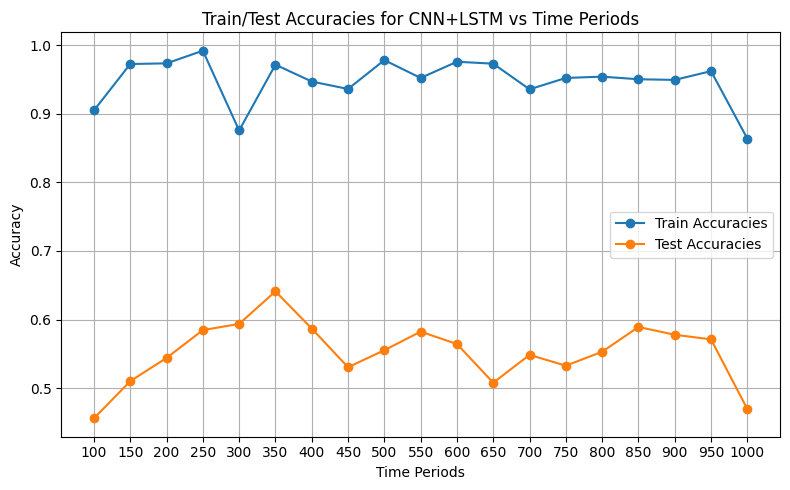

In [5]:
import matplotlib.pyplot as plt

# Data points
time_periods = list(range(100, 1001, 50))
train_accuracies = [0.9049645662307739, 0.9725768566131592, 0.9735224843025208, 0.991962194442749, 0.8756501078605652, 0.9716312289237976, 0.9470449090003967, 0.936170220375061, 0.9782505631446838, 0.9522458910942078, 0.9758865237236023, 0.9730496406555176, 0.9356973767280579, 0.9522458910942078, 0.9541370868682861, 0.9503546357154846, 0.949409008026123, 0.9621749520301819, 0.8638297915458679]
test_accuracies = [0.45598194003105164, 0.5101580023765564, 0.544018030166626, 0.5846500992774963, 0.5936794877052307, 0.6410835385322571, 0.5869074463844299, 0.530474066734314, 0.555304765701294, 0.5823927521705627, 0.5643340945243835, 0.5079006552696228, 0.5485327243804932, 0.5327313542366028, 0.5530474185943604, 0.5891647934913635, 0.5778781175613403, 0.5711060762405396, 0.4695259630680084]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time_periods, train_accuracies, marker='o', label='Train Accuracies')
plt.plot(time_periods, test_accuracies, marker='o', label='Test Accuracies')
#plt.axhline(y=0.641, color='r', linestyle='--', label='Best Accuracy = 0.641')
plt.title('Train/Test Accuracies for CNN+LSTM vs Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Accuracy')
plt.xticks(time_periods)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()